#Synapse Divded by Unmasked w/o Zero Unmasked

We remove each row where unmasked == zero, as that means there are no voxels to be measured. We then divide the number of synapses by the unmasked value in order to find synapses per voxel for each datapoint. This shows us the distribution of the density of synapses more clearly than the raw data.

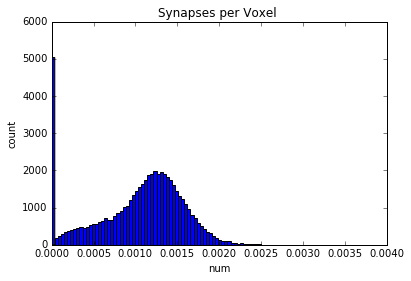

In [2]:
#synapse_divided_by_unmasked

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import urllib2

url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
noZeroMask = csv[a, :]

synapseDividedByUnmasked = np.divide(noZeroMask[:,4],noZeroMask[:,3])
fig = plt.figure(5)
ax = fig.gca()
plt.hist(synapseDividedByUnmasked,bins=100)
ax.set_title('Synapses per Voxel ')
ax.set_xlabel('num')
ax.set_ylabel('count')

plt.show()

We see that there is almost a gausian distribution of the density of synapse